In [ ]:
!pip install keras

## Deteksi penyakit pada padi
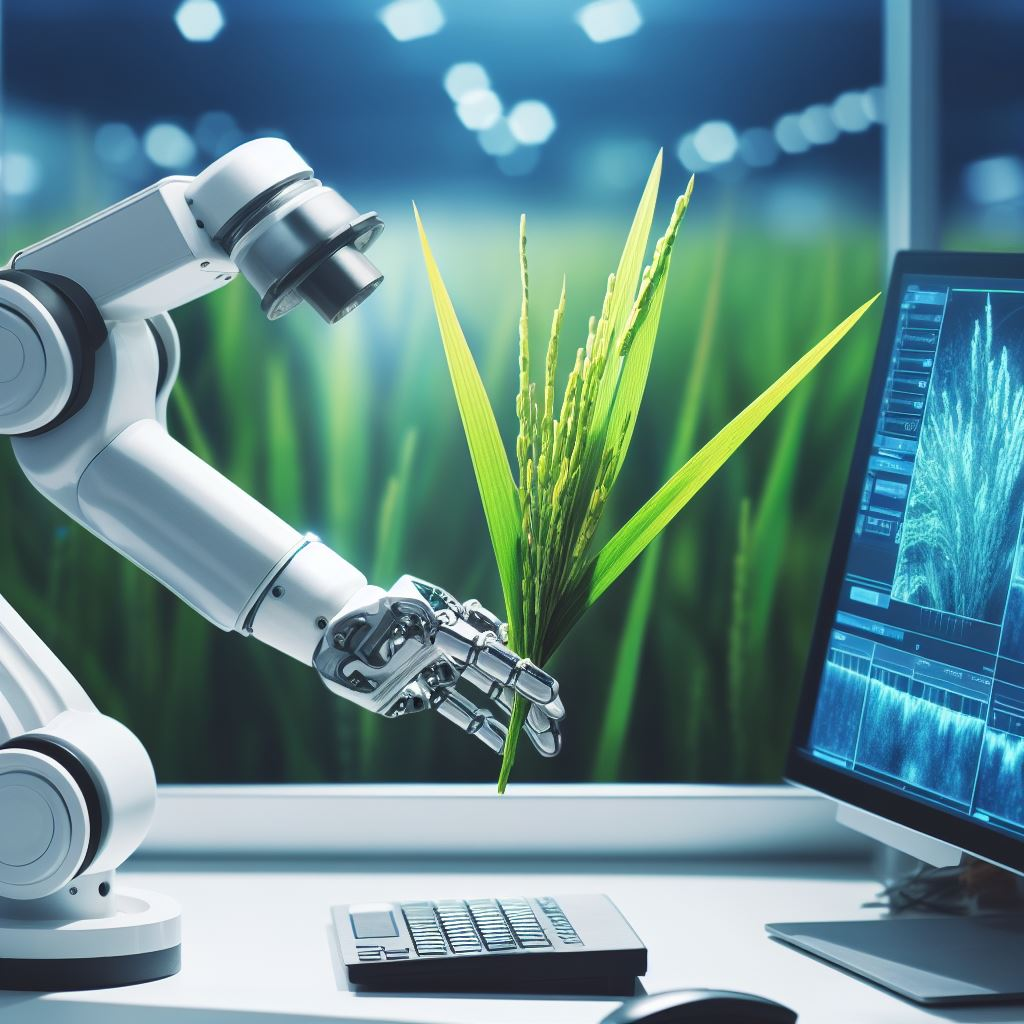

In [ ]:
# import library
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras import regularizers
import os
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/content/drive/MyDrive/dataset/Rice-Leaf-Disease-Images/' # import dataset folder

Name=[]
for file in os.listdir(dir):
    Name+=[file]
print(Name)
print(len(Name))

['Tungro', 'Blast', 'Brownspot', 'Bacterialblight', 'Healthy']
5


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

In [ ]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(dir,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<1000:
                dataset.append([image,count])
            else:
                testset.append([image,count])
            t+=1
    count=count+1

In [ ]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [ ]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [ ]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [ ]:
print(len(labels))
print(len(tlabels))

4342
1414


In [ ]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(3473, 100, 100, 3)
(869, 100, 100, 3)
(3473, 5)
(869, 5)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(5, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
109/109 [==============================] - 216s 2s/step - loss: 0.3982 - accuracy: 0.8632 - val_loss: 0.1663 - val_accuracy: 0.9482
Epoch 2/30
109/109 [==============================] - 193s 2s/step - loss: 0.1398 - accuracy: 0.9551 - val_loss: 0.1305 - val_accuracy: 0.9540
Epoch 3/30
109/109 [==============================] - 194s 2s/step - loss: 0.1159 - accuracy: 0.9614 - val_loss: 0.1068 - val_accuracy: 0.9609
Epoch 4/30
109/109 [==============================] - 190s 2s/step - loss: 0.0991 - accuracy: 0.9657 - val_loss: 0.0573 - val_accuracy: 0.9770
Epoch 5/30
109/109 [==============================] - 193s 2s/step - loss: 0.0640 - accuracy: 0.9784 - val_loss: 0.0607 - val_accuracy: 0.9770
Epoch 6/30
109/109 [==============================] - 193s 2s/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0509 - val_accuracy: 0.9804
Epoch 7/30
109/109 [==============================] - 194s 2s/step - loss: 0.0510 - accuracy: 0.9830 - val_loss: 0.0578 - val_accuracy: 0.9747

In [ ]:
from sklearn.metrics import classification_report, log_loss, accuracy_score

y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

28/28 [==============================] - 53s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      0.97      0.99       181
           2       0.99      1.00      1.00       192
           3       0.98      1.00      0.99       222
           4       1.00      1.00      1.00       193

    accuracy                           0.99       869
   macro avg       1.00      0.99      0.99       869
weighted avg       0.99      0.99      0.99       869



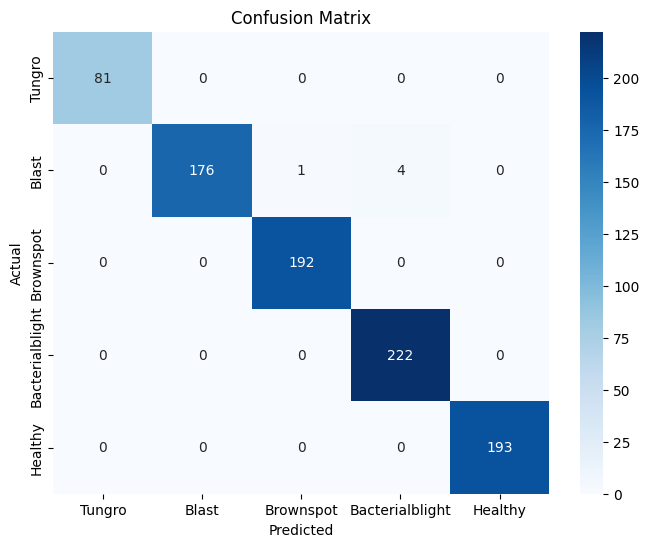

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Confusion Matrix
cm = confusion_matrix(ground, pred)



# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Tungro', 'Blast', 'Brownspot', 'Bacterialblight','Healthy'],
            yticklabels=['Tungro', 'Blast', 'Brownspot', 'Bacterialblight', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

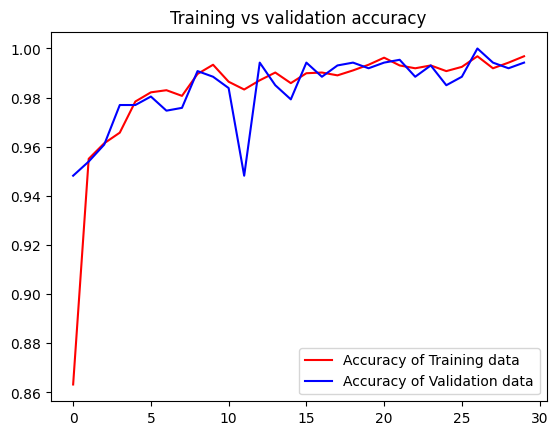

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
model.save('99_99.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with open('99_99.tflite', 'wb') as f:
    f.write(tflite_model)

28/28 [==============================] - 40s 1s/step


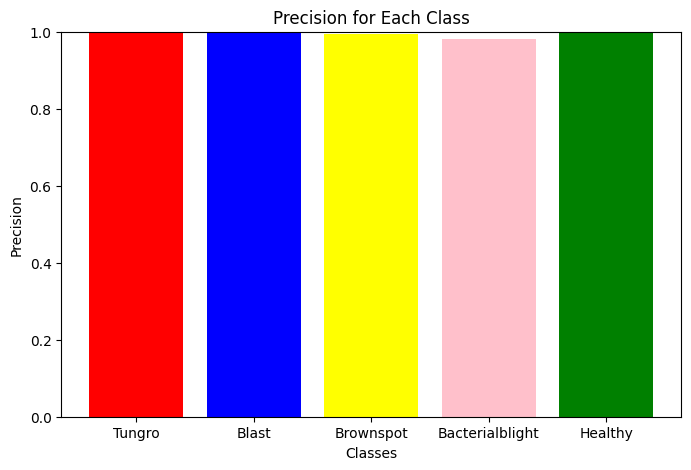

In [ ]:
from sklearn.metrics import classification_report



y_pred = model.predict(testx)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(testy, axis=1)


report = classification_report(ground, pred, target_names=['Tungro', 'Blast', 'Brownspot', 'Bacterialblight', 'Healthy'], output_dict=True)


class_names = list(report.keys())[:-3]
accuracies = [report[class_name]['precision'] for class_name in class_names]


plt.figure(figsize=(8, 5))
plt.bar(class_names, accuracies, color=['red', 'Blue', 'yellow', 'pink', 'green'])
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision for Each Class')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi
plt.show()


In [ ]:
from PIL import Image

loaded_model = load_model('99_99.h5')

image_path = 'Brownspot.jpg'
img = Image.open(image_path)
img = img.resize((100, 100))

# Konversi gambar menjadi array numpy
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

# Lakukan prediksi menggunakan model H5
predictions = loaded_model.predict(img_array)

# Konversi hasil prediksi ke dalam persentase
class_names = ['Tungro', 'Blast', 'Brownspot', 'Bacterialblight', 'Healthy']  # Ganti dengan label kelas sesuai dengan model kamu
percentage_predictions = tf.nn.softmax(predictions[0]) * 100

# Tampilkan hasil prediksi
for class_name, percentage in zip(class_names, percentage_predictions):
    print(f'{class_name}: {percentage:.2f}%')

NameError: ignored